In [1]:
import numpy as np
import matplotlib.pyplot as plt

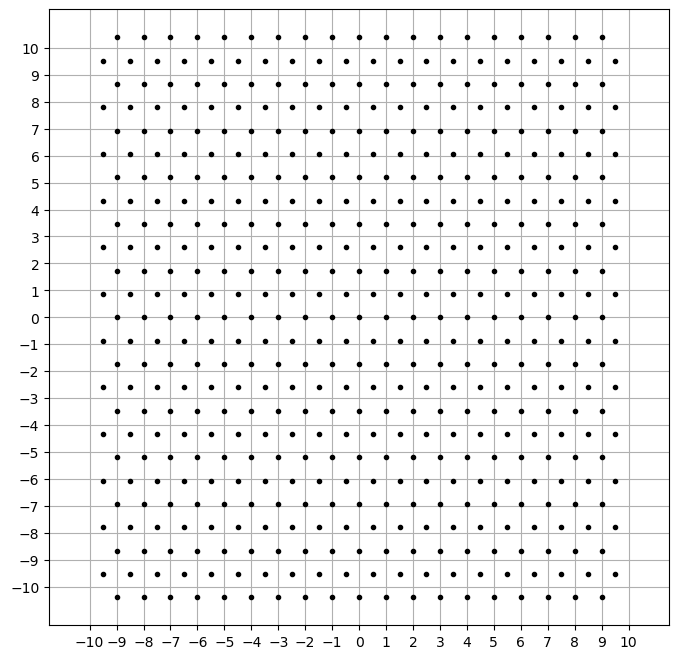

In [2]:
#given two vectors (arrays)
#generate n, k points to make a grid (input a depth)
#draw brillouin zones by perpindicular bisectors of the points

def convert_to_G(a1,a2): #seems to work correctly, not tested rigorously
    M = np.array([[0,-1],
                  [1,0]]) #90 deg rotation matix
    
    a2t = np.matmul(M,a2)
    a1t = np.matmul(M,a1)
    b1 = 2*np.pi * a2t / (np.dot(a1,a2t))
    b2 = 2*np.pi * a1t / (np.dot(a2,a1t))
    return np.array([b1, b2])

def lattice(b1, b2, N):
    #asked chat gtp to rewrite code with no for loops
    #the way the lattice works but is a little convoluted, worth cleaning up later
    #clean up how hs and ls are generated because they have length and the grid is in dir of unit vector!
    mag_b1 = np.sqrt(b1.dot(b1)) #get magnitudes for calculation
    mag_b2 = np.sqrt(b2.dot(b2))
    theta = np.arccos(b1.dot(b2) / (mag_b1 * mag_b2)) #calculate theta using dot product definition
    
    hs = np.arange(0, (N+1), mag_b1) #hs runs along x axis, b1 should stay [1,0], x,y
    #no mag b1 I guess, because it is already in units steps of mag_b1
    ls = np.arange(0,((N+1)/np.sin(theta)), mag_b2)
    #ls = np.arange(0, ((N+1)/np.sin(theta)) * (mag_b1/mag_b2), mag_b2) #used def of parallelogram to make height N*b1
    #mult by magnitude of both so hs and ls is essentially the lengths and we do unit vector for direction below
    h_grid, l_grid = np.meshgrid(hs, ls) #create grids of h and l values
    lattice_points = h_grid.reshape(-1, 1) * b1/mag_b1 + l_grid.reshape(-1, 1) * b2/mag_b2 #reshape grids and calculate lattice points
    
    if b1.dot(b2)!=0:
        big_xs = lattice_points[lattice_points[:,0]>=(N)*mag_b1][:,0] - (N)*mag_b1
        big_ys = lattice_points[lattice_points[:,0]>=(N)*mag_b1][:,1]
        lattice_points[lattice_points[:,0]>=(N)*mag_b1] = np.stack((big_xs, big_ys), axis=-1)
    
    #Quadrant 1
    Q1 = np.stack((lattice_points[:,0], lattice_points[:,1]),axis=-1)
    #Quadrant 2
    Q2 = np.stack((-lattice_points[:,0], lattice_points[:,1]),axis=-1)
    #Quadrant 3
    Q3 = np.stack((-lattice_points[:,0], -lattice_points[:,1]),axis=-1)
    #Quadrant 4
    Q4 = np.stack((lattice_points[:,0], -lattice_points[:,1]),axis=-1)
    
    return np.unique(np.concatenate((Q1,Q2,Q3,Q4)),axis=0) #should make it the whole grid, waiting on best way to do that

b1 = np.array([1,0])
b2 = np.array([1/2,np.sqrt(3)/2])
#b2 = np.array([0,1])
N=10
lats = lattice(b1,b2,N)

plt.figure(figsize=(8,8))
plt.plot(lats[:,0], lats[:,1], marker='.', color='k', linestyle='none')
plt.xticks(np.arange(-N, N+1, 1.0))
plt.yticks(np.arange(-N, N+1, 1.0))
plt.grid()
plt.axis("equal")
plt.show()

[-10. -10.]
[-10.  -5.]
[-10.   5.]
[-10.  10.]
[ -5. -10.]
[-5. -5.]
[-5.  5.]
[-5. 10.]
[  5. -10.]
[ 5. -5.]
[5. 5.]
[ 5. 10.]
[ 10. -10.]
[10. -5.]
[10.  5.]
[10. 10.]


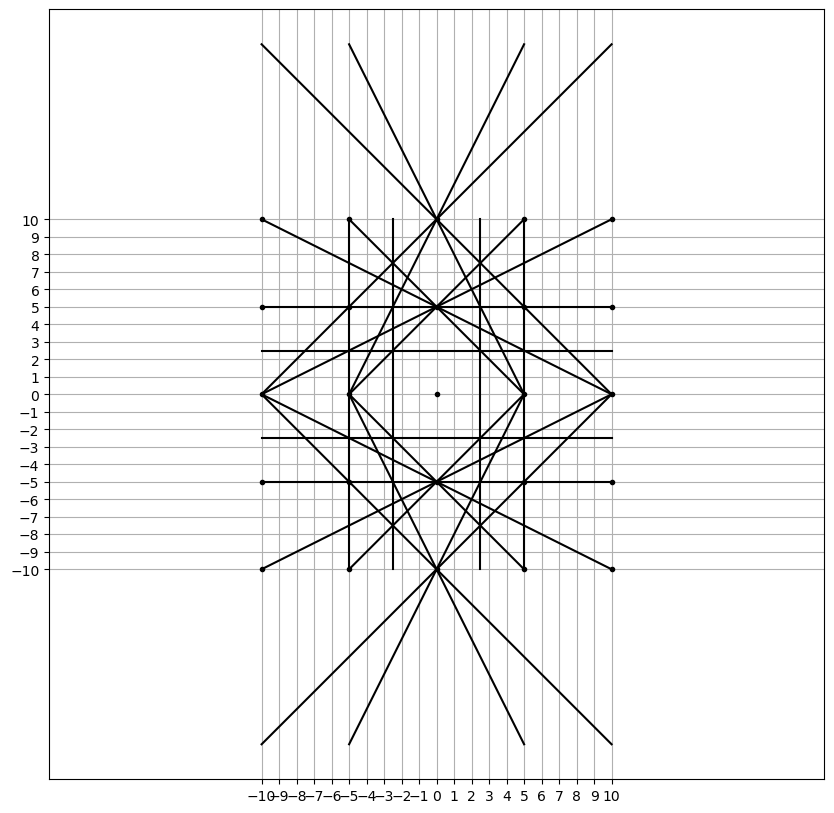

In [15]:
#code to draw perpindicular bisector

b1 = np.array([5,0])
#b2 = np.array([1/2,np.sqrt(3)/2])
b2 = np.array([0,5])
N=10
lats = lattice(b1,b2,N)

plt.figure(figsize=(10,10))
# for point in lats:
#     if point[0]==0 and point[1]==0: continue
#     if point[0]==0:
#         xs = np.arange(-N,(N+1),1)
#         plt.plot(xs,[point[1]/2]*len(xs))
#     elif point[1]==0:
#         xs = np.arange(-N,(N+1),1)
#         plt.plot([point[0]/2]*len(xs),xs)
#     else: #point[0]!=0
#         mag_p = np.sqrt(point.dot(point))
#         xs = np.arange(-mag_p,mag_p+1,1)
#         m = point[1]/(-point[0])
#         plt.plot(xs,m*xs+point[1])
        
        
#the above code works, is too messy and hard to see brillouin zones
#develope cleaner code
#store all of the slopes, so they can be used to test if point and circle intersects the lines
#draw lines to last line?? they always intersect 
def BZ_lines(lattice):    
    #grab lattice with y = 0, points on x axis
    xax_mask = lattice[:,1]==0
    xax_points = lattice[xax_mask]
    #in form of y=mx+b where array([m,b])
    xax_slope = np.zeros_like(xax_points[:,0])
    xax_intercept = xax_points[:,0]/2
    xax_lines = np.stack((xax_slope, xax_intercept), axis=-1)
    
    #grab lattice with x = 0, points on y axis
    yax_mask = lattice[:,0]==0
    yax_points = lattice[yax_mask]
    yax_slope = np.zeros_like(yax_points[:,1])
    yax_intercept = yax_points[:,1]/2
    yax_lines = np.stack((yax_slope, yax_intercept), axis=-1)
    
    #do the rest 
    tot_mask = ~xax_mask & ~yax_mask
    offax_points = lattice[tot_mask]
    offax_slope = offax_points[:,1]/(-offax_points[:,0])
    offax_intercept = offax_points[:,1]
    offax_lines = np.stack((offax_slope, offax_intercept), axis=-1)
    
    all_lines = (xax_lines, yax_lines, offax_lines)
    all_points = (xax_points, yax_points, offax_points)
    return all_points, all_lines#xax_lines, yax_lines, offax_lines

points, lines = BZ_lines(lats)

c='black'
for i in range(len(lines)):
    for p, l in zip(points[i],lines[i]):
        if l[1] == 0: continue #no intercept should be 0
        if i == 2:#and abs(l[1])!=10 and abs(p[0])!=10:
            print(p)
            xs = np.linspace(-p[0],p[0],100)
            plt.plot(xs,l[0]*xs+l[1],color=c)
        elif i==1:
            xs = np.linspace(-N,N,100)
            plt.plot(xs,[l[1]]*len(xs),color=c)
        elif i==0:
            xs = np.linspace(-N,N,100)
            plt.plot([l[1]]*len(xs),xs,color=c)


plt.plot(lats[:,0], lats[:,1], marker='.', color='k', linestyle='none')
plt.xticks(np.arange(-N, N+1, 1.0))
plt.yticks(np.arange(-N, N+1, 1.0))
plt.grid()
plt.axis("equal")
plt.show()

In [10]:
t1 = np.array([1,2,3,4,5])
t2 = np.array([1,2,3,4,5])
print(t1/t2)

[1. 1. 1. 1. 1.]


In [ ]:
#Decommissioned Code

def my_lattice(b1,b2,N):
    #my code
    mag_b1 = np.sqrt(b1.dot(b1)) #get magnitudes for calculation
    mag_b2 = np.sqrt(b2.dot(b2))
    theta = np.arccos(b1.dot(b2)/(mag_b1*mag_b2)) #calculate theta using dot product definition
    
    hs = np.arange(0, (N+1), mag_b1) #hs runs along x axis, b1 should stay [1,0], x,y
    ls = np.arange(0,((N+1)/np.sin(theta)), mag_b2)
    #ls = np.arange(0, ((N+1)/np.sin(theta)) * (mag_b1/mag_b2), mag_b2) #used def of parallelogram to make height N*b1
    #mult by magnitude of both so hs and ls is essentially the lengths and we do unit vector for direction below

    lattice_points = []
    for l in ls:
        for h in hs:
            lattice_points.append(h*b1/mag_b1+l*b2/mag_b2)

    lattice_points = np.array(lattice_points)
    if b1.dot(b2)!=0:
        big_xs = lattice_points[lattice_points[:,0]>=(N)*mag_b1][:,0] - (N)*mag_b1
        big_ys = lattice_points[lattice_points[:,0]>=(N)*mag_b1][:,1]
        lattice_points[lattice_points[:,0]>=(N)*mag_b1] = np.stack((big_xs, big_ys), axis=-1)       
    
    return np.array(lattice_points)


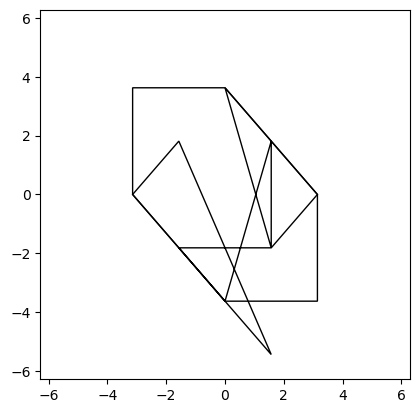

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


#HOW CHATGTP WANTED TO DRAW THE LATTICE, USE POLYGON AND DEFINE THE VERTICES!!!!!!!
# Define lattice vectors
a1 = np.array([1, 0])
a2 = np.array([-1/2, np.sqrt(3)/2])

# Define reciprocal lattice vectors
b1 = 2*np.pi*np.array([0, 1/np.sqrt(3)])
b2 = 2*np.pi*np.array([1/2, -1/np.sqrt(3)])

# Define the first Brillouin zone (hexagon)
bz_vertices = [
    b1,
    b1+b2,
    b2,
    -b1,
    -b1-b2,
    -b2
]
bz_polygon = Polygon(bz_vertices, linewidth=1, edgecolor='k', facecolor='none')

# Define the second Brillouin zone (dodecagon)
sbz_vertices = [
    b1 + b2/2,
    b1 + b2,
    b2/2,
    -b1 - b2/2,
    -b1 - b2,
    -b2/2,
    -b1 + b2/2,
    -b1 - b2/2,
    -b1,
    b1 + b2/2,
    b1,
    b2/2
]
sbz_polygon = Polygon(sbz_vertices, linewidth=1, edgecolor='k', facecolor='none')

# Plot the Brillouin zones
fig, ax = plt.subplots()
ax.add_patch(bz_polygon)
ax.add_patch(sbz_polygon)
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-2*np.pi, 2*np.pi)
ax.set_aspect('equal')
plt.show()
